In [234]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
df=pd.read_csv("Breast_Cancer.csv")

In [270]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [271]:
df.drop("Status", axis=1, inplace=True) #1 kere çalıştırılır

In [272]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50


In [273]:
print(df.columns)

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months'],
      dtype='object')


In [274]:
df.shape

(4024, 15)

In [275]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
dtype: int64

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
dtypes: i

In [277]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,54.0,9.0,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.5,21.1,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.4,8.1,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.2,5.1,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.3,22.9,1.0,56.0,73.0,90.0,107.0


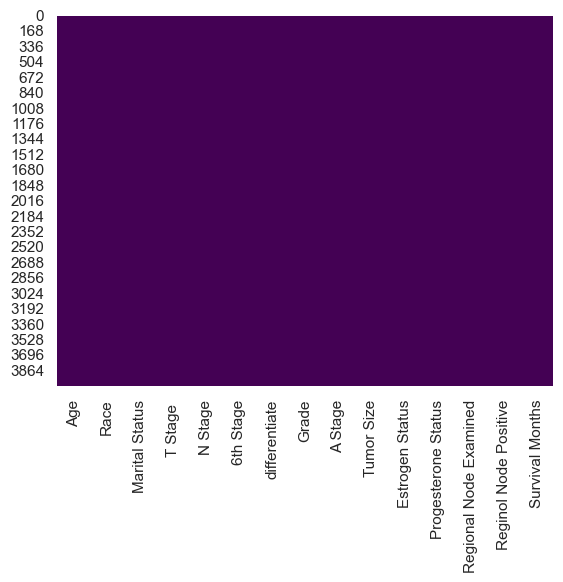

In [278]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()
# boş değerleri ısı haritası ile gözlemliyoruz

branch 1
    EDA 
        A planın
        - Problem tanımlanmış olacak -> Survival months tahmin edilecek (regresyon)
        - Model belirlenmiş olacak 
      - 
branch 2
    Data Preporcess
    Model
    Model Tune
    Model evaluation


## Kategorik Değişkenleri Düzenleme

In [279]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [280]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['T Stage'] = label_encoder.fit_transform(df['T Stage '])
df['N Stage'] = label_encoder.fit_transform(df['N Stage'])
df['6th Stage'] = label_encoder.fit_transform(df['6th Stage'])

In [281]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,T Stage
0,68,White,Married,T1,0,0,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,0
1,50,White,Married,T2,1,2,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,1
2,58,White,Divorced,T3,2,4,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,2
3,58,White,Married,T1,0,0,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,0
4,47,White,Married,T2,0,1,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,0,0,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,0
4020,56,White,Divorced,T2,1,2,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,1
4021,68,White,Married,T2,0,1,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,1
4022,58,Black,Divorced,T2,0,1,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,1


In [282]:
df["6th Stage"]

0       0
1       2
2       4
3       0
4       1
       ..
4019    0
4020    2
4021    1
4022    1
4023    1
Name: 6th Stage, Length: 4024, dtype: int32

In [283]:
df["Grade"].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [284]:
filtered_rows = df[df['Grade'] == ' anaplastic; Grade IV'].index
print(filtered_rows)

Index([ 277,  616,  618,  767, 1013, 1061, 1458, 1541, 1560, 1716, 2172, 2177,
       2246, 2411, 2717, 3073, 3212, 3248, 3526],
      dtype='int64')


In [285]:
for index, satir in df.iterrows():
    # Burada, her bir satırdaki belirli bir sütunun kategorik olup olmadığını kontrol edebilirsiniz.
    # Örneğin, 'SutunAdi' sütunu kategorikse, aşağıdaki gibi bir işlem yapabilirsiniz:
    if isinstance(satir['Grade'], str):
        # Değiştirmek istediğiniz kategorik değeri kontrol edin ve değiştirin
        if satir['Grade'] == ' anaplastic; Grade IV':
            df.at[index, 'Grade'] = '4'

In [264]:
filtered_rows = df[df['Grade'] == ' anaplastic; Grade IV'].index
print(filtered_rows)

Index([], dtype='int64')


In [286]:
df["Grade"].unique()

array(['3', '2', '1', '4'], dtype=object)

In [287]:
df['Grade'] = df['Grade'].astype(int)
print(df.dtypes)

Age                        int64
Race                      object
Marital Status            object
T Stage                   object
N Stage                    int32
6th Stage                  int32
differentiate             object
Grade                      int32
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
T Stage                    int32
dtype: object


In [307]:
df["Grade"].value_counts()

Grade
2    2351
3    1111
1     543
4      19
Name: count, dtype: int64

In [288]:
df_encoded = pd.get_dummies(df, columns=['Race', 'Marital Status', 'A Stage', 'Estrogen Status', 'Progesterone Status','differentiate'], dtype=int)

In [289]:
df_encoded

,Age,T Stage,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,T Stage,...,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated
0,68,T1,0,0,3,4,24,1,60,0,...,0,1,0,1,0,1,0,1,0,0
1,50,T2,1,2,2,35,14,5,62,1,...,0,1,0,1,0,1,1,0,0,0
2,58,T3,2,4,2,63,14,7,75,2,...,0,1,0,1,0,1,1,0,0,0
3,58,T1,0,0,3,18,2,1,84,0,...,0,1,0,1,0,1,0,1,0,0
4,47,T2,0,1,3,41,3,1,50,1,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,T1,0,0,2,9,1,1,49,0,...,0,1,0,1,0,1,1,0,0,0
4020,56,T2,1,2,2,46,14,8,69,1,...,0,1,0,1,0,1,1,0,0,0
4021,68,T2,0,1,2,22,11,3,69,1,...,0,1,0,1,1,0,1,0,0,0
4022,58,T2,0,1,2,44,11,1,72,1,...,0,1,0,1,0,1,1,0,0,0


In [290]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Age                                      4024 non-null   int64 
 1   T Stage                                  4024 non-null   object
 2   N Stage                                  4024 non-null   int32 
 3   6th Stage                                4024 non-null   int32 
 4   Grade                                    4024 non-null   int32 
 5   Tumor Size                               4024 non-null   int64 
 6   Regional Node Examined                   4024 non-null   int64 
 7   Reginol Node Positive                    4024 non-null   int64 
 8   Survival Months                          4024 non-null   int64 
 9   T Stage                                  4024 non-null   int32 
 10  Race_Black                               4024 non-null   int

In [291]:
df_encoded.columns

Index(['Age', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'Tumor Size',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'T Stage', 'Race_Black', 'Race_Other', 'Race_White',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single ',
       'Marital Status_Widowed', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive',
       'Progesterone Status_Negative', 'Progesterone Status_Positive',
       'differentiate_Moderately differentiated',
       'differentiate_Poorly differentiated', 'differentiate_Undifferentiated',
       'differentiate_Well differentiated'],
      dtype='object')

In [292]:
df_encoded.drop("T Stage ", axis=1, inplace=True) 

In [293]:
df_encoded.head()

,Age,N Stage,6th Stage,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,T Stage,Race_Black,...,A Stage_Distant,A Stage_Regional,Estrogen Status_Negative,Estrogen Status_Positive,Progesterone Status_Negative,Progesterone Status_Positive,differentiate_Moderately differentiated,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated
0,68,0,0,3,4,24,1,60,0,0,...,0,1,0,1,0,1,0,1,0,0
1,50,1,2,2,35,14,5,62,1,0,...,0,1,0,1,0,1,1,0,0,0
2,58,2,4,2,63,14,7,75,2,0,...,0,1,0,1,0,1,1,0,0,0
3,58,0,0,3,18,2,1,84,0,0,...,0,1,0,1,0,1,0,1,0,0
4,47,0,1,3,41,3,1,50,1,0,...,0,1,0,1,0,1,0,1,0,0


In [294]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Age                                      4024 non-null   int64
 1   N Stage                                  4024 non-null   int32
 2   6th Stage                                4024 non-null   int32
 3   Grade                                    4024 non-null   int32
 4   Tumor Size                               4024 non-null   int64
 5   Regional Node Examined                   4024 non-null   int64
 6   Reginol Node Positive                    4024 non-null   int64
 7   Survival Months                          4024 non-null   int64
 8   T Stage                                  4024 non-null   int32
 9   Race_Black                               4024 non-null   int32
 10  Race_Other                               4024 non-null   int32
 11  Race

In [295]:
df_encoded.rename(columns={'Marital Status_Separated': 'Separated',
                   'Marital Status_Married': 'Married',
                   'Marital Status_Single ': 'Single',
                   'Marital Status_Widowed':'Widowed',
                   'Marital Status_Divorced':'Divorced',
                   'differentiate_Moderately differentiated':'Moderately',
                   'differentiate_Poorly differentiated':'Poorly',
                   'differentiate_Undifferentiated':'Undifferentiated',
                   'differentiate_Well differentiated':'Well',
                   'Race_Black':'Black',
                   'Race_Other':'Other',
                   'Race_White':'White'
                   }, inplace=True)

In [296]:
df_encoded.columns

Index(['Age', 'N Stage', '6th Stage', 'Grade', 'Tumor Size',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'T Stage', 'Black', 'Other', 'White', 'Divorced', 'Married',
       'Separated', 'Single', 'Widowed', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive',
       'Progesterone Status_Negative', 'Progesterone Status_Positive',
       'Moderately', 'Poorly', 'Undifferentiated', 'Well'],
      dtype='object')

In [297]:
correlation_matrix = df_encoded.corr().round(3)
#pd.set_option('display.float_format', '{:.1f}'.format)
print(correlation_matrix)

                              Age  N Stage  6th Stage  Grade  Tumor Size  \
Age                           1.0      0.0       -0.0   -0.1        -0.1   
N Stage                       0.0      1.0        0.9    0.2         0.3   
6th Stage                    -0.0      0.9        1.0    0.2         0.5   
Grade                        -0.1      0.2        0.2    1.0         0.1   
Tumor Size                   -0.1      0.3        0.5    0.1         1.0   
Regional Node Examined       -0.0      0.3        0.3    0.1         0.1   
Reginol Node Positive         0.0      0.8        0.8    0.1         0.2   
Survival Months              -0.0     -0.1       -0.1   -0.1        -0.1   
T Stage                      -0.1      0.3        0.6    0.1         0.8   
Black                        -0.0      0.0        0.0    0.1         0.0   
Other                        -0.1      0.0        0.0   -0.0         0.0   
White                         0.1     -0.0       -0.0   -0.0        -0.0   
Divorced    

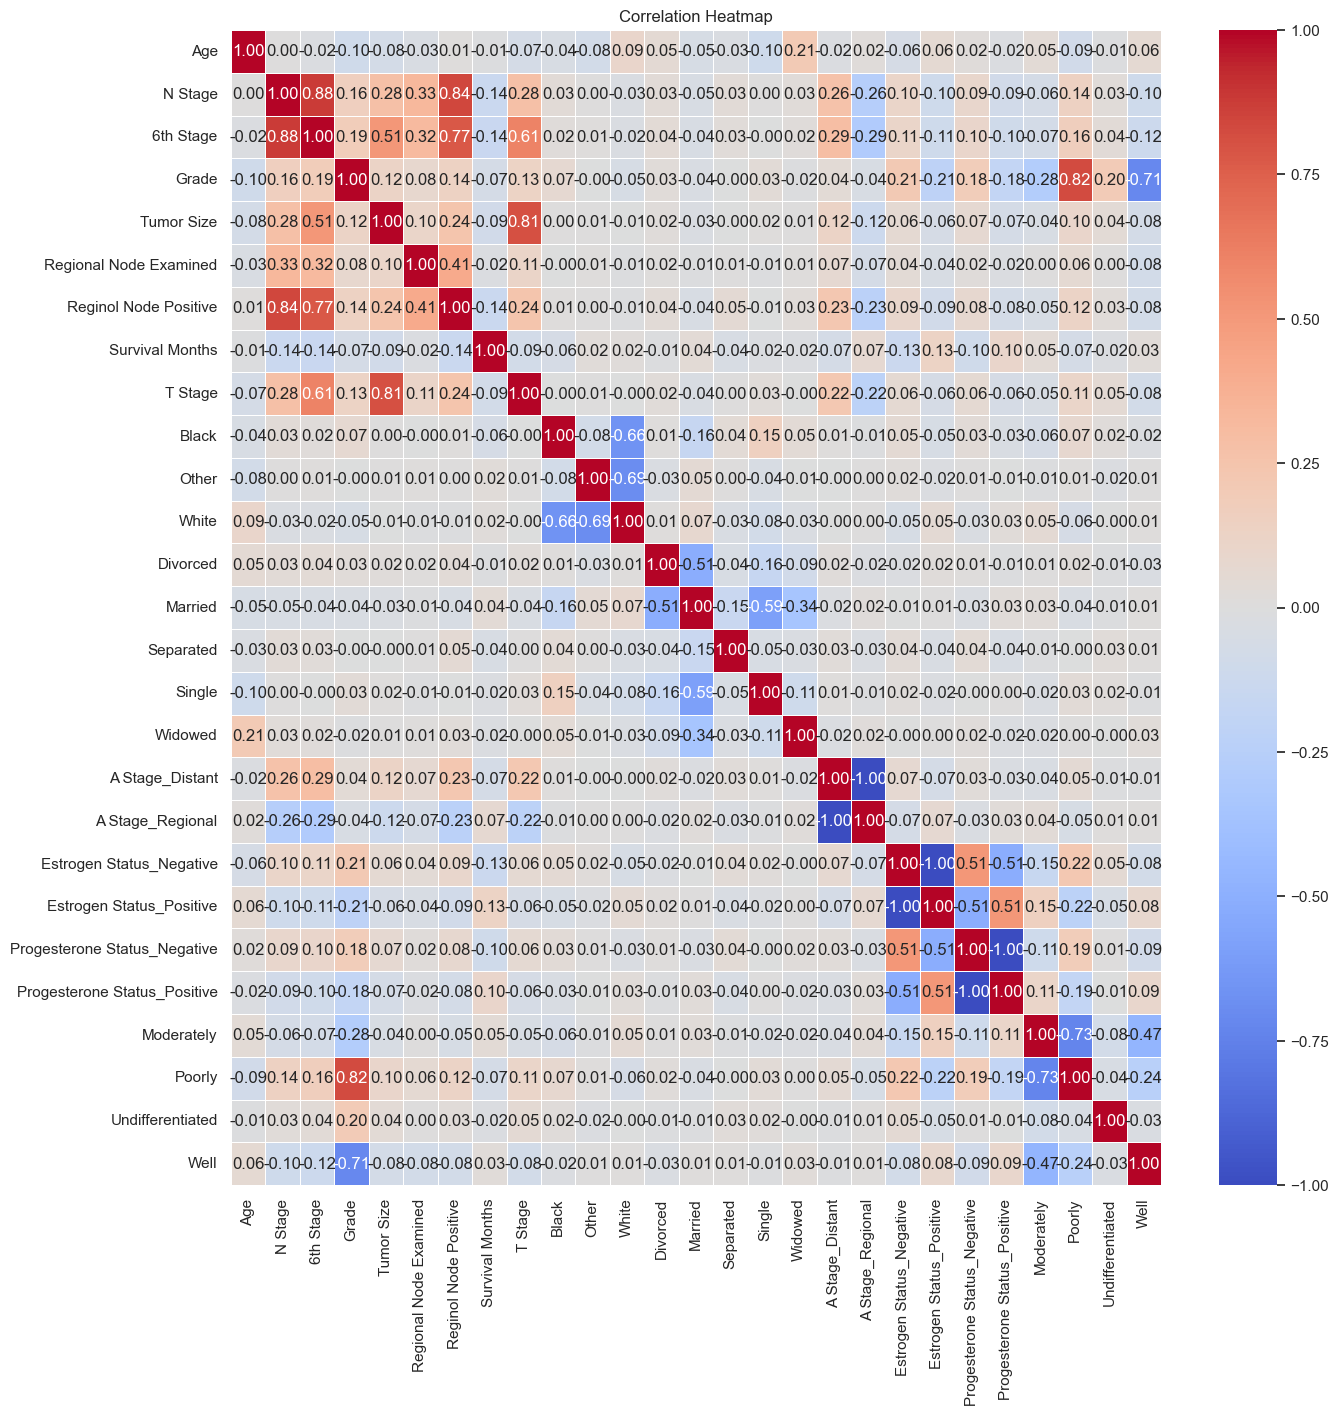

In [298]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Survival Months', ylabel='Single'>

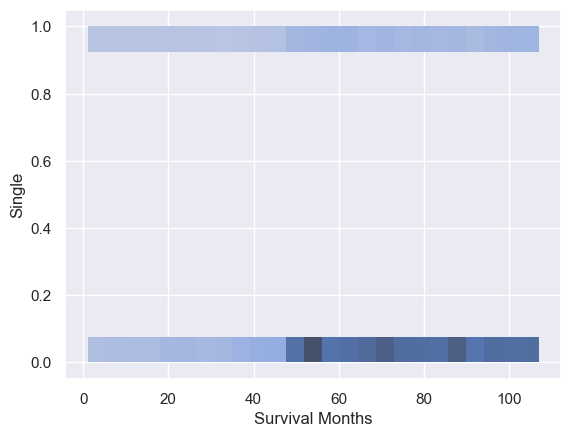

In [300]:
sns.histplot(x="Survival Months", y="Single", data=df_encoded)

<Axes: xlabel='Survival Months', ylabel='Count'>

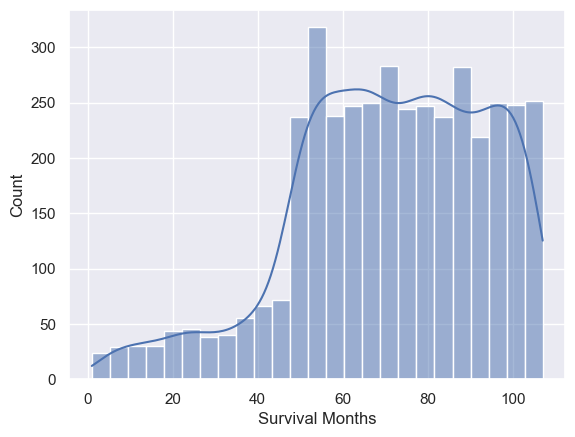

In [301]:
sns.histplot(data=df_encoded, x='Survival Months', kde=True)

<Axes: xlabel='Survival Months', ylabel='Tumor Size'>

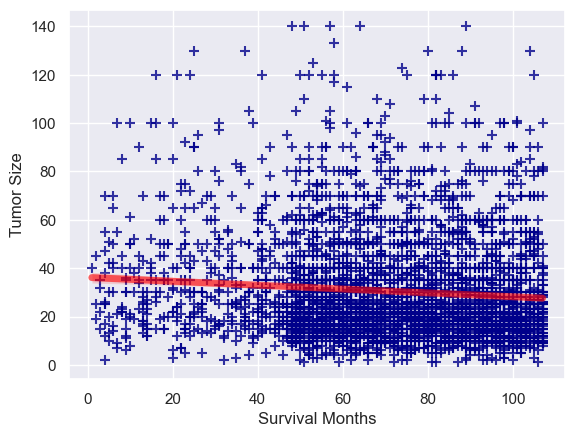

In [302]:
sns.regplot(
    x=df_encoded['Survival Months'],
    y=df_encoded['Tumor Size'],
    marker= "+",
    line_kws={
        "color":"red",
        "alpha":0.6,
        "lw":5 
    },
    scatter_kws={
        "color":"darkblue",
        "s":50
    }
    )

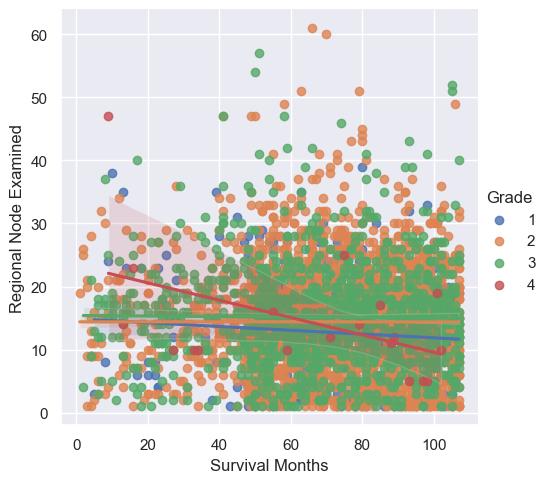

In [303]:
sns.lmplot(
    x='Survival Months',
    y='Regional Node Examined',
    data=df_encoded ,
    hue="Grade"
)

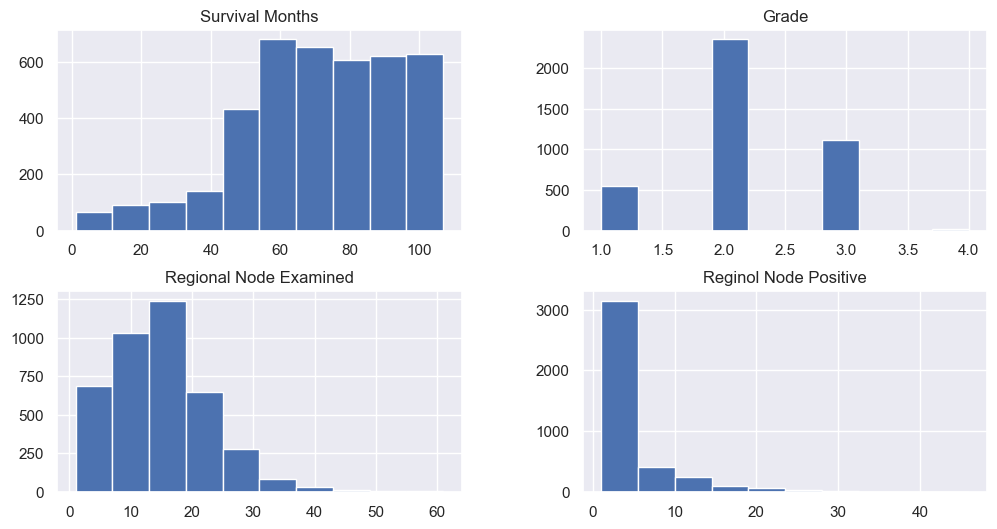

In [313]:
plt.rcParams['figure.figsize'] = (12,6)

viz = df_encoded[['Survival Months','Grade','Regional Node Examined','Reginol Node Positive']]
viz.hist()
plt.show()

- Yukarıdaki grafiğe göre incelenen düğüm sayısı genellikle 10-20 arası, tespit edilen düğüm sayısı ise 0-10 arasında rastlanmış

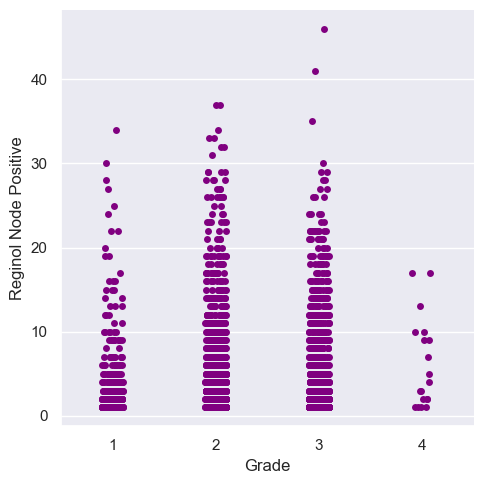

In [323]:
sns.catplot(x="Grade", y="Reginol Node Positive", color="purple", data=df_encoded)

## Sınıflandırma Problemi Belirleme

#### Random Forests

In [330]:
X = df_encoded[["Age", "N Stage", "6th Stage", "Grade", "Tumor Size",
       "Regional Node Examined", "Reginol Node Positive", "T Stage", "Black", "Other", "White", "Divorced", "Married",
       "Separated", "Single", "Widowed", "A Stage_Distant", "A Stage_Regional",
       "Estrogen Status_Negative", "Estrogen Status_Positive",
       "Progesterone Status_Negative", "Progesterone Status_Positive",
       "Moderately", "Poorly", "Undifferentiated", "Well"]]
y = df_encoded["Survival Months"]

In [332]:
from sklearn.model_selection import train_test_split

In [334]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [335]:
from sklearn.ensemble import RandomForestRegressor

In [336]:
rf_model=RandomForestRegressor(random_state=42)

In [337]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

##### Tahmin

In [338]:
rf_model.predict(X_test)[0:5]

array([79.14, 61.24, 71.83, 77.69, 73.97])

In [339]:
y_pred=rf_model.predict(X_test)

In [444]:
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [342]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.1984368803696

##### Model Tuning

In [344]:
rf_params={"max_depth":list(range(1, 10)),
           "max_features":[3, 5, 10, 15],
           "n_estimators":[100, 200, 500, 1000, 2000]}

In [345]:
rf_model=RandomForestRegressor(random_state=42)

In [347]:
from sklearn.model_selection import GridSearchCV

#### modeli iyileştirme:
Hyperparameter tuning: Modelin hyperparameter'larını optimize edin. GridSearchCV veya RandomizedSearchCV gibi teknikler kullanılabilir

In [348]:
rf_cv_model=GridSearchCV(rf_model,
                         rf_params,
                         cv=10,
                         n_jobs=-1) # eş zamanlı yapılacak işlemleride devreye alır

In [349]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [350]:
rf_cv_model.best_params_

{'max_depth': 5, 'max_features': 3, 'n_estimators': 1000}

In [351]:
rf_tuned=RandomForestRegressor(max_depth=5, 
                               max_features=3,
                                n_estimators=1000)

In [352]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=3, n_estimators=1000)

In [353]:
y_pred=rf_tuned.predict(X_test)

In [372]:
mse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"test hatası(MSE): {mse}")

test hatası(MSE): 22.231882258899972


In [370]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared:", {r2})

R-squared: {0.05886621606066256}


In [360]:
Importance=pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                        index=X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

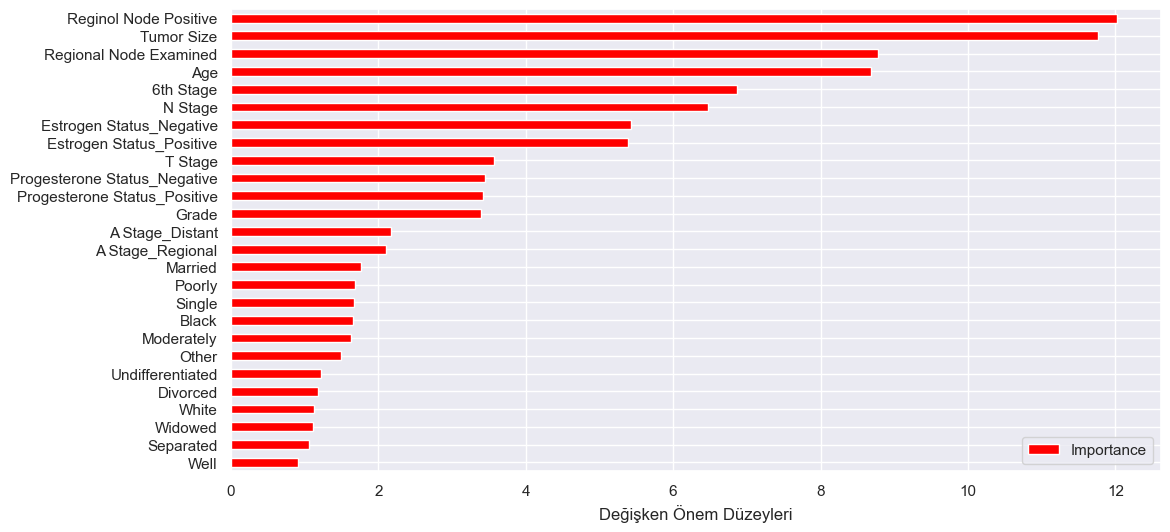

In [365]:
Importance.sort_values(by="Importance",
                        axis=0, 
                        ascending=True).plot(kind="barh",color="red")
plt.xlabel("Değişken Önem Düzeyleri")

! Bu kod, Random Forest regresyon modelinin özniteliklerinin önem sıralamasını belirlemek için kullanılır. feature_importances_ özelliği, her bir özniteliğin modelin tahmin yaparken ne kadar etkili olduğunu ölçen bir dizi döndürür.

- bağımlı değişkene olan katkılarını gözlemleyebiliyoruz. Hatalara olan etkilerine göre analiz edilebilir.
- çok etki etmeyenler veri setinden çıkarılabilir.
- değişiken seçme aralarında karar verme gibi durumları seçebiliriz.

##### Veri setine etkisi olmayan değişkenleri kaldırmak

In [ ]:
df_cleaned = df_encoded.drop(["Separated", "Widowed","Divorced","Well","Undifferentiated","Moderately","White","Other","Black"], axis=1)

In [ ]:
df_encoded.columns

In [425]:
from sklearn.preprocessing import StandardScaler

# Standardizasyon
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

### Modeli tekrar eğitelim

In [426]:
X = df_encoded[["Age", "N Stage", "6th Stage", "Grade", "Tumor Size",
       "Regional Node Examined", "Reginol Node Positive", "T Stage", "Married",
       "Single", "A Stage_Distant", "A Stage_Regional",
       "Estrogen Status_Negative", "Estrogen Status_Positive",
       "Progesterone Status_Negative", "Progesterone Status_Positive",
       "Poorly"]]
y = df_encoded["Survival Months"]

# Veriyi eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi normalize edin
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Modelinizi oluşturun ve eğitin
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_normalized, y_train)

# Test seti üzerinde tahmin yapın
y_pred = model.predict(X_test_normalized)

# Performans metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 540.8610406054239


#### New model tuning

In [430]:
rf_params_new={"max_depth":list(range(1, 10)),
           "max_features":[3, 5, 10, 15],
           "n_estimators":[100, 200, 500, 1000, 2000]}

In [431]:
model=RandomForestRegressor(random_state=42)

In [432]:
rf_cv_model_new=GridSearchCV(model,
                         rf_params_new,
                         cv=10,
                         n_jobs=-1) # eş zamanlı yapılacak işlemleride devreye alır

In [433]:
rf_cv_model_new.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [434]:
rf_cv_model_new.best_params_

{'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}

In [435]:
rf_tuned_new=RandomForestRegressor(max_depth=5, 
                               max_features=3,
                                n_estimators=1000)

In [436]:
rf_tuned_new.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=3, n_estimators=1000)

In [437]:
y_pred=rf_tuned_new.predict(X_test)

In [438]:
mse=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"test hatası(MSE): {mse}")

test hatası(MSE): 22.342527025199434


In [439]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared:", {r2})

R-squared: {0.06600188921480621}


In [440]:
Importance_new=pd.DataFrame({"Importance New": rf_tuned_new.feature_importances_*100},
                        index=X_train.columns)

Text(0.5, 0, 'Yeni Değişken Önem Düzeyleri')

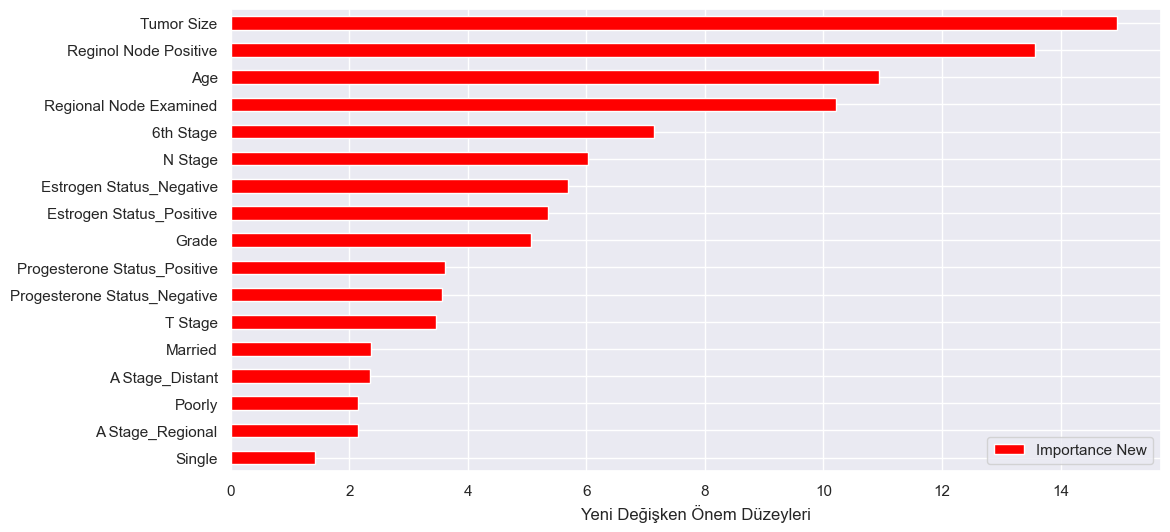

In [441]:
Importance_new.sort_values(by="Importance New",
                        axis=0, 
                        ascending=True).plot(kind="barh",color="red")
plt.xlabel("Yeni Değişken Önem Düzeyleri")

### Evaluation

##### Performans metrikleri

In [445]:
# Regresyon metriklerini hesaplayın
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 499.1885
Mean Absolute Error (MAE): 18.3542
R-squared (R2): 0.0660
